In [1]:
#in questo notebook faccio LMM e t-test (sia parametrico che non) per vedere l'impatto delle mie VI sulla VD = BoxOpenedPerTrial (i.e., numero di box aperte per trial)

In [2]:
import json
import os
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.optimize as opt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from copy import deepcopy

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [4]:
data = pd.read_csv('out/results.csv')  # read data

In [5]:
import statsmodels

endog = data["BoxOpenedPerTrial"] # variabile dipendente - VisitedAreas si riferisce al numero di aree visitate dal soggetto in quel trial
exog = data[["LongBattery","RichEnvironment","FirstAreaRich"]] # variabili indipendenti


groups = data['Subject'] # nel modello lineare misto devo mettere il gruppo
model = statsmodels.regression.mixed_linear_model.MixedLM(endog, exog, groups)
result = model.fit()
print(result.summary())

formula = "BoxOpenedPerTrial ~  LongBattery * FirstAreaRich + LongBattery * RichEnvironment + RichEnvironment * FirstAreaRich" 


model = smf.mixedlm(formula, data=data, groups = data['Subject'])

result = model.fit()
print(result.summary())

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: BoxOpenedPerTrial
No. Observations: 1240    Method:             REML             
No. Groups:       31      Scale:              2.1014           
Min. group size:  40      Log-Likelihood:     -2321.9720       
Max. group size:  40      Converged:          Yes              
Mean group size:  40.0                                         
----------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------------
LongBattery       5.413     0.082  65.680  0.000   5.251   5.574
RichEnvironment   0.297     0.098   3.026  0.002   0.105   0.490
FirstAreaRich     0.043     0.116   0.366  0.714  -0.186   0.271
Group Var        31.511     5.631                               

                         Mixed Linear Model Regression Results
Model:                     MixedLM         Dep

In [6]:
condizione_15 = (data["LongBattery"] == True) & (data["RichEnvironment"] == True) & (data["FirstAreaRich"] == True)
data15 = data [condizione_15]

condizione_16 = (data["LongBattery"] == True) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == True)
data16 = data [condizione_16]

condizione_17 = (data["LongBattery"] == False) & (data["RichEnvironment"] == True) & (data["FirstAreaRich"] == True)
data17 = data [condizione_17]

condizione_18 = (data["LongBattery"] == False) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == True)
data18 = data [condizione_18]



box_opened_per_trial_15 = data15["BoxOpenedPerTrial"] 
box_opened_per_trial_15  = box_opened_per_trial_15 .to_numpy() 

box_opened_per_trial_16 = data16["BoxOpenedPerTrial"] 
box_opened_per_trial_16 = box_opened_per_trial_16.to_numpy() 

box_opened_per_trial_17 = data17["BoxOpenedPerTrial"] 
box_opened_per_trial_17 = box_opened_per_trial_17.to_numpy()

box_opened_per_trial_18 = data18["BoxOpenedPerTrial"]
box_opened_per_trial_18 = box_opened_per_trial_18.to_numpy()

(array([ 0.,  0.,  2.,  5., 27., 44., 41., 32., 10.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

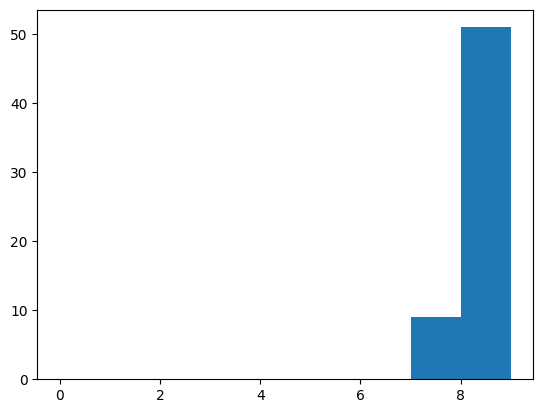

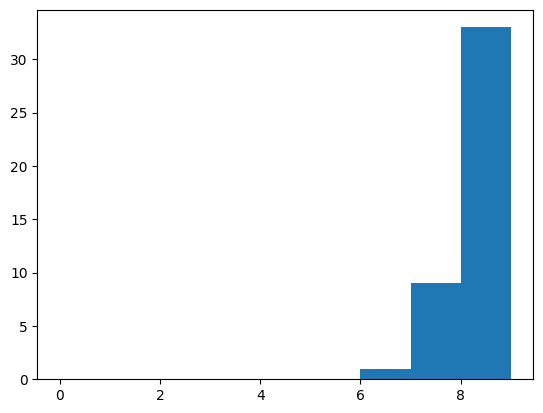

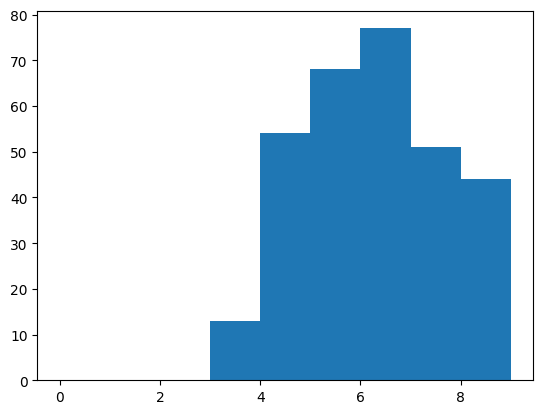

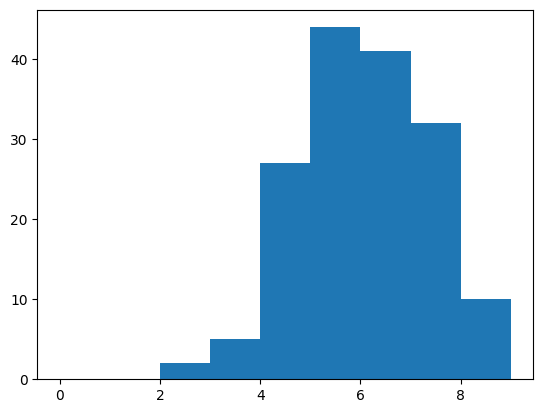

In [7]:

plt.figure()
plt.hist(box_opened_per_trial_15,np.arange(10))

plt.figure()
plt.hist(box_opened_per_trial_16,np.arange(10))

plt.figure()
plt.hist(box_opened_per_trial_17,np.arange(10))

plt.figure()
plt.hist(box_opened_per_trial_18,np.arange(10))

In [8]:
# a seguire faccio il t-test

import scipy.stats as stats

# t-test delle condizioni in cui la batteria è lunga
t_stat, p_value = stats.ttest_ind(box_opened_per_trial_15, box_opened_per_trial_16)
print("t-test a campioni indipendenti sulle condizioni con la batteria lunga:", t_stat, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")



# t-test delle condizioni in cui la batteria è corta
t_stat, p_value = stats.ttest_ind(box_opened_per_trial_17, box_opened_per_trial_18)
print("t-test a campioni indipendenti sulle condizioni con la batteria corta:", t_stat, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")

t-test a campioni indipendenti sulle condizioni con la batteria lunga: 1.7291444311176254 0.08443296307075257
Nessuna differenza significativa
t-test a campioni indipendenti sulle condizioni con la batteria corta: 1.6592697169399164 0.09773138601708146
Nessuna differenza significativa


In [9]:
import scipy.stats as stats


statistic, p_value = stats.mannwhitneyu(box_opened_per_trial_15, box_opened_per_trial_16)
print("t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria lunga:", statistic, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")



statistic, p_value = stats.mannwhitneyu(box_opened_per_trial_17, box_opened_per_trial_18)
print("t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria corta:", statistic, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")

t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria lunga: 28473.0 0.1409312352563917
Nessuna differenza significativa
t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria corta: 26645.0 0.1959281017631188
Nessuna differenza significativa


In [11]:
# Perform Mann-Whitney U test and store results
results = []
statistic, p_value = stats.mannwhitneyu(box_opened_per_trial_15, box_opened_per_trial_16)
results.append(["Long battery conditions", statistic, p_value, "Significant difference" if p_value < 0.05 else "Non significant difference"])

statistic, p_value = stats.mannwhitneyu(box_opened_per_trial_17, box_opened_per_trial_18)
results.append(["Short battery conditions", statistic, p_value, "Significant difference" if p_value < 0.05 else "Non significant difference"])

# Create a DataFrame to store the results
columns = ["Test", "Statistic", "P-Value", "Significance"]
results_df = pd.DataFrame(results, columns=columns)

# Save the results to a CSV file
results_df.to_csv('BoxOpenedPerTrial_mannwhitneyresults.csv', index=False)

print("Results saved to 'BoxOpenedPerTrial_mannwhitneyresults.csv'.")
print(results)

Results saved to 'BoxOpenedPerTrial_mannwhitneyresults.csv'.
[['Long battery conditions', 28473.0, 0.1409312352563917, 'Non significant difference'], ['Short battery conditions', 26645.0, 0.1959281017631188, 'Non significant difference']]
